In [1]:
#import the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import  datasets, tree
from sklearn import  metrics as m
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve,RocCurveDisplay, roc_auc_score, roc_curve
from matplotlib.pyplot import xticks,yticks

In [2]:
#load the data
data = pd.read_csv('bioresponse.csv')

In [3]:
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = data.Activity.values
x = data.iloc[:, 1:]

In [5]:
#separate traind and test data
train_data, test_data, train_labels, test_labels = train_test_split(x,y, test_size = 0.25,random_state = 11)

# 1. Training the classifiers

In [6]:
predictions = []

In [7]:
#small decision tree
small_tree = tree.DecisionTreeClassifier(max_depth = 4, random_state = 42)
small_tree.fit(train_data,train_labels);
predictions.append(small_tree.predict(test_data))


In [8]:
#deep decision tree
deep_tree = tree.DecisionTreeClassifier(max_depth = 25, random_state = 42)
deep_tree.fit(train_data,train_labels);
deep_tree.predict_proba(test_data)
predictions.append(deep_tree.predict(test_data))


In [9]:
#random forest on small trees
small_forest = RandomForestClassifier(max_depth=4, random_state = 42)
small_forest.fit(train_data,train_labels);
predictions.append(small_forest.predict(test_data))


In [10]:
#random forest on deep trees
deep_forest = RandomForestClassifier(max_depth=25, random_state = 42)
deep_forest.fit(train_data,train_labels);
predictions.append(deep_forest.predict(test_data))



#2. Calculating metrics


In [11]:
#calculate the metrics
metrics =[]
for i in range(len(predictions)):
  precision = m.precision_score(test_labels,predictions[i])
  recall = m.recall_score(test_labels,predictions[i])
  accuracy = m.accuracy_score(test_labels,predictions[i])
  f1_score = m.f1_score(test_labels,predictions[i])
  logloss = m.log_loss(test_labels,predictions[i])
  met = [precision,recall,accuracy,f1_score,logloss]
  metrics.append(met)

In [12]:
# this func makes a table
def make_table_2d(table_data,
               row_headers = ['Small Tree','Deep Tree','Random Forest on small trees','Random Forest on deep trees'],
               column_headers = ['Precision','Recall','Accuracy','F1-score','Log-loss']):

    for data in table_data:
      for i in range(5):
        data[i] = round(data[i],3)
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=table_data,
        rowLabels=row_headers,
        colLabels=column_headers,
        loc='center',
        cellLoc='center')

    plt.show()

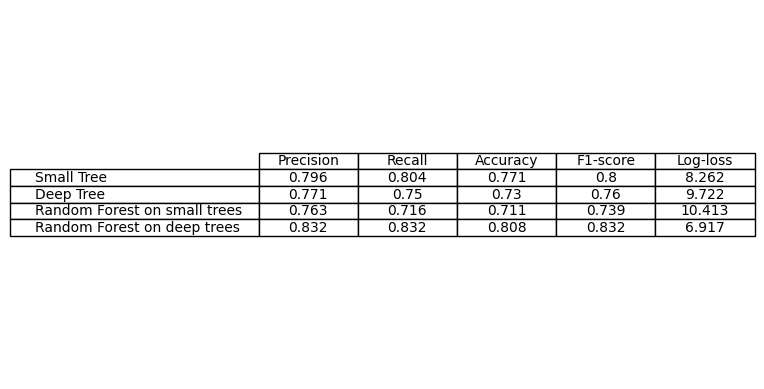

In [13]:
make_table_2d(metrics)

# 3. Precision-Recall and ROC curves

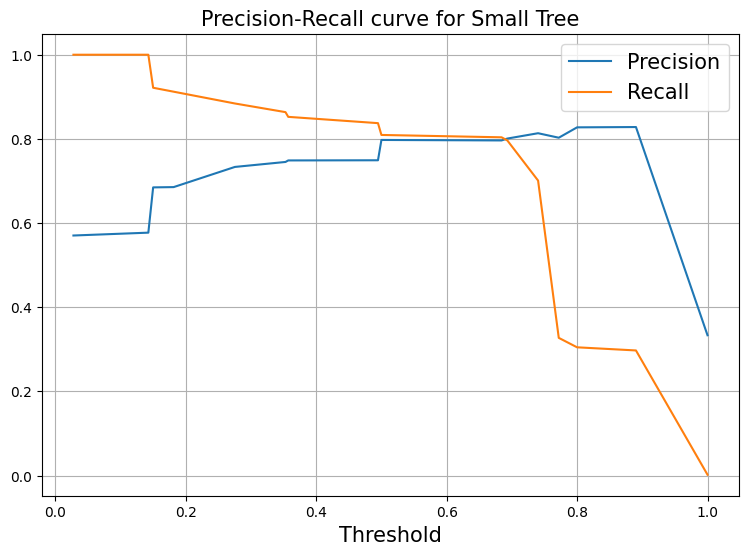

In [14]:
prec, rec, thresh = precision_recall_curve(test_labels, small_tree.predict_proba(test_data)[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve for Small Tree',fontsize = 15)
plt.legend(fontsize = 15)

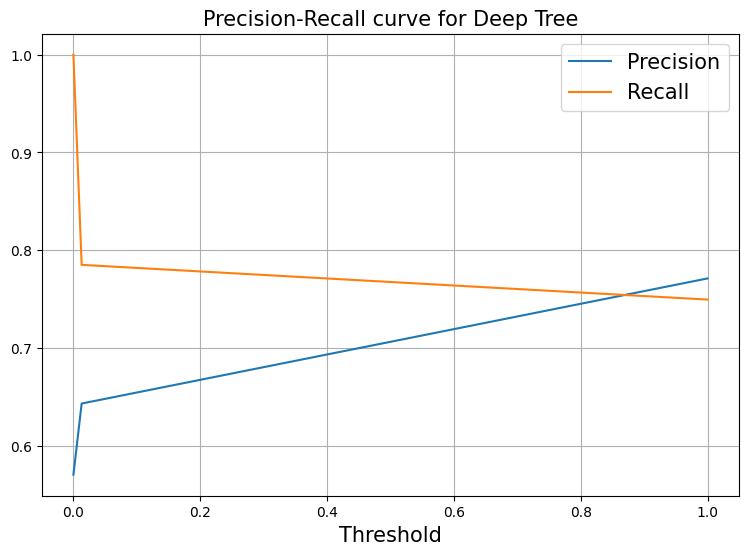

In [15]:
prec, rec, thresh = precision_recall_curve(test_labels, deep_tree.predict_proba(test_data)[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve for Deep Tree',fontsize = 15)
plt.legend(fontsize = 15)

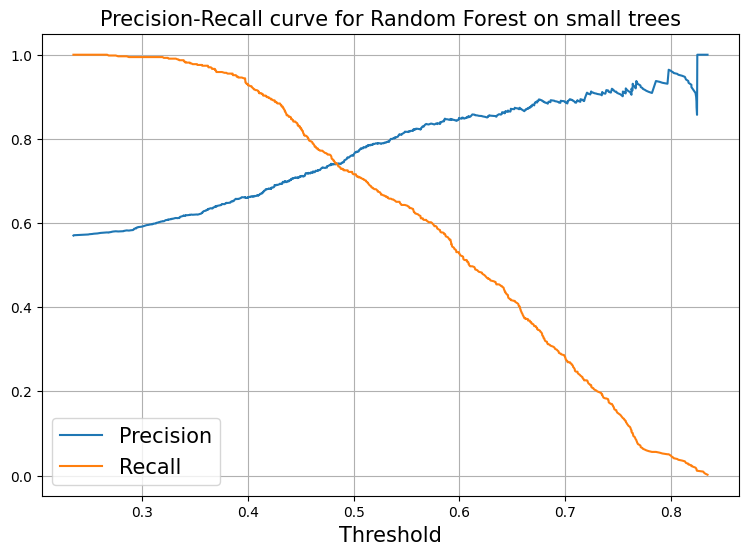

In [16]:
prec, rec, thresh = precision_recall_curve(test_labels, small_forest.predict_proba(test_data)[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve for Random Forest on small trees',fontsize = 15)
plt.legend(fontsize = 15)

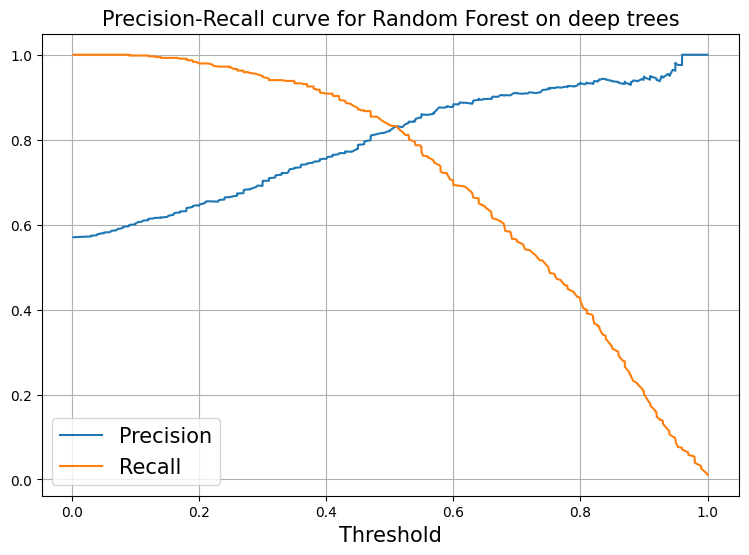

In [17]:
prec, rec, thresh = precision_recall_curve(test_labels, deep_forest.predict_proba(test_data)[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve for Random Forest on deep trees',fontsize = 15)
plt.legend(fontsize = 15)

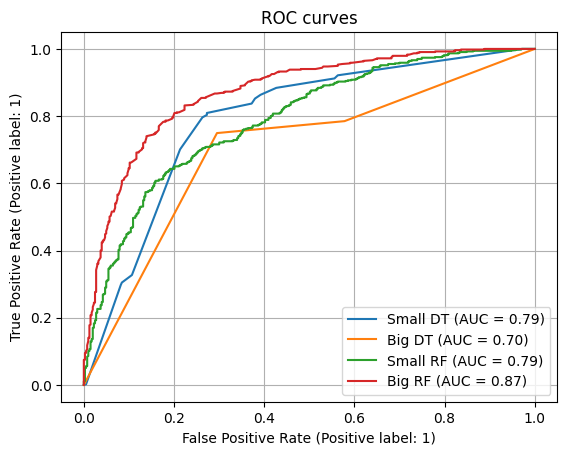

In [18]:
#ROC curves
fig, ax = plt.subplots()

models = [
    ("Small DT", small_tree),
    ("Big DT", deep_tree),
    ("Small RF", small_forest),
    ("Big RF", deep_forest)
]

model_displays = {}
for name, pipeline in models:
    model_displays[name] = RocCurveDisplay.from_estimator(
        pipeline, test_data, test_labels, ax=ax, name=name
    )
_ = ax.set_title("ROC curves")
plt.grid()

# 4. A Classifier who avoids Type II (False Negative) errors

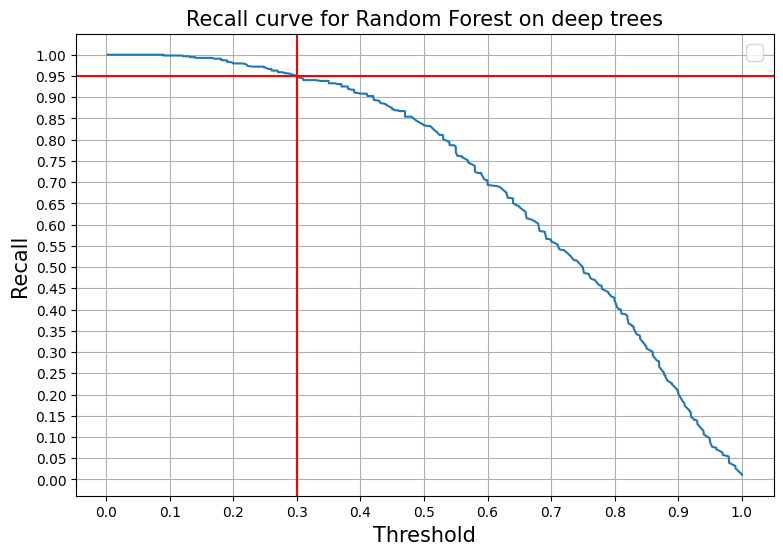

In [19]:
# Plot Recall curve for one of the classifiers -  Random Forest on small trees
prec, rec, thresh = precision_recall_curve(test_labels, deep_forest.predict_proba(test_data)[:,1])

plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, rec[:-1])
plt.axhline(y = 0.95, color = 'r', linestyle = '-')
plt.axvline(x = 0.3, color = 'r', linestyle = '-',)
plt.xlabel(u"Threshold",fontsize = 15)
plt.ylabel(u"Recall",fontsize = 15)
xticks(np.arange(0, 1.1, step=0.1))
yticks(np.arange(0, 1.05, step=0.05))
plt.title(u'Recall curve for Random Forest on deep trees',fontsize = 15)
plt.legend(fontsize = 15)

From the graph it is clear that optimal Recall (>= 0.95) can be reached with the use of threshold withing the approximate interval of [0;0.3]

In [23]:
# Minimize the threshold and check the recall

y_pred = (small_forest.predict_proba(test_data)[:,1] >= 0.3).astype(bool)
print(f'Recall for classification with threshold = 0.3 is equal to ',m.recall_score(test_labels,y_pred))

Recall for classification with threshold = 0.3 is equal to  0.994392523364486


As we can see, the chosen threshold successfully solves the problem of minimizing Type 2 errors.